# Assignment due Jan 22 - Linear Regression

The goal of this assignment is to explore a data set and then preform linear regression on that data. Here are the parts

- Q1 Warm Up
- Q2 Import the Data (population vs. profit) and Create a Scatter Plot
- Q3 Find information about your data: Max of each feature, Min of each feature, number of samples. Then create two numpy column vectors. One that contains population the other profit.
- Q4 Write a function that calculates the mean squared error cost function
- Q5 Create a surface plot the graphs the cost function for a range of values
- Q6 Using the Normal Equation to minimize the cost function, find the line of best fit
- Q7 Make a plot that shows the original scatter plot of the data and the line that you just created
- Q8 Write a function that uses your linear regression formula to make predictions. Given the population of the city predict what the company profits are.

Data for this assignment originally comes from: https://www.coursera.org/learn/machine-learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 - Warm Up

- Write code that creates a 5x5 identiy matrix using numpy and then changes the entries along the diagonal to be the numbers 1-5.
- Create a python function that reads in an existing dataframe, a name, birth month, and favorite animal and appends this to the existing dataframe.
- Use your function to create a dataframe that contains 5 entries

In [2]:
# Matrix with 1-5 along diagonal
Identity = np.identity(5) #Sets up an identity matrix, with ones on the diagonal

for i in range(5): #for numbers from 0 to 4
    
    if(Identity[i,i]==1): #if row#=coulm# equal 1
        
        Identity[i,i] = i+1 #Add it in increments
        
print(Identity)

[[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5.]]


In [3]:
# Function to append dataframe
mydata = pd.DataFrame([{'Name':'Joanna','Month':'Feb','Animal':'Otter'},{'Name':'Tamara','Month':'Nov','Animal':'Cat'}])

def cojoining_DataFrames(X,Y): #Function with two data frames
    
    Y = Y.append(X) #Takes Y dataframe and adds on the X data fram
    
    return Y

In [4]:
# Use your function
Experiment = pd.DataFrame([{'Name':'Noah', 'Month':'Dec', 'Animal':'Giraffe'}])
Experiment2 = pd.DataFrame([{'Name':'Trinity', 'Month':'Day', 'Animal':'Duck'}])
Experiment3 = pd.DataFrame([{'Name':'Peggy', 'Month':'Oct', 'Animal':'Dragonfly'}])

mydata2 = cojoining_DataFrames(mydata,Experiment)
mydata3 = cojoining_DataFrames(mydata2,Experiment2)
mydata4 = cojoining_DataFrames(mydata3,Experiment3)
print(mydata4)


      Name Month     Animal
0    Peggy   Oct  Dragonfly
0  Trinity   Day       Duck
0     Noah   Dec    Giraffe
0   Joanna   Feb      Otter
1   Tamara   Nov        Cat


## Question 2 - Import and Explore the Data

The data for this assignment can be found at

URL = http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt

this data is in csv format. It contains data that matches the population of a city (units = tens of thousands) with the profit that a company makes (units = tens of thousands).

In [5]:
# Use Pandas to read in the data, label the first column "Population" and the second column "Profit"
# Display that first few rows of the data.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt'

df=pd.read_csv(URL, names = ['Population', 'Profit']) #Reads info from the URL and name the first coulm Population and the second profi

print(df)


    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


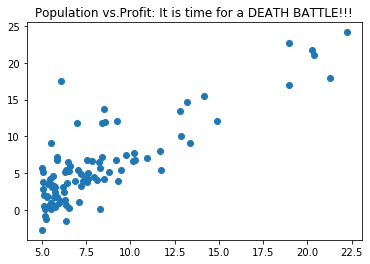

In [6]:
# Create a Scatter Plot with labeled axis that plots Population (x) vs Profit (y). Create a fun title for this plot.
x = df['Population'] #Sets x to values of population column

y = df['Profit'] #Sets y to values of profit column

plt.plot(x, y, 'o') #Sets x as x-axis, y as y-axis, and uses points to plot data

plt.title('Population vs.Profit: It is time for a DEATH BATTLE!!!')
plt.show()

Does it appear at least plausable that this relationship can be described using linear regression (a straight line)?

In [7]:
# Prep your data for machine learning by creating two numpy column vectors
# One should contain x=population the other y=profit
x_numpy_conversion = x.to_numpy() #Converts x values to numpy as we will be using numpy operations

y_numpy_conversion = y.to_numpy() #Converts y vales to numpy

x_pop = x_numpy_conversion.reshape(x_numpy_conversion.size, 1) #Vectorizes the x conversion to a single column
y_prof = y_numpy_conversion.reshape(y_numpy_conversion.size, 1) #Vectorizes the y conversion to a single column

print(x_pop.shape, y_prof.shape)
print(x_pop, y_prof)

(97, 1) (97, 1)
[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.

In [8]:
# Append your x data to add a column of ones
print(x_pop.shape)
Ones = np.ones((97,1), dtype=int) #Creats a single column of 97 ones

x_pop_2 = np.append(Ones, x_pop, axis = 1) #Adds the x vector to the ones vector
print(x_pop_2)


(97, 1)
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1

In [9]:
# Check that the arrays are the correct shape
print(x_pop_2.shape) #Just testing shape of matrices
print(y_prof.shape)
type(x_pop_2)

(97, 2)
(97, 1)


numpy.ndarray

## Question 3 - Cost Function

Create a python function that reads in the vectors x and y, some parameter values theta, and the number of samples. It should return the value of the mean squared error cost function.

Test your code using our data a initial guess theta=[0,0]

NOTE: You should get The cost function value: 32.072733877455676


In [10]:
# Compute_Cost function here
# X = x_pop_2 and Y = y

def Cost_Function(X,Y,theta): #CostFunction = ((x*theta - y).T * (x*theta - y)) / 2*m[0] where m is the size of (x*theta - y)
    
    Cost_Component = np.subtract(np.matmul(X, theta), Y) #Sets (x*theta - y)

    m = Cost_Component.shape #Creates m

    Cost_Without_m = np.matmul(Cost_Component.T, Cost_Component) #Sets (x*theta - y).T * (x*theta - y)

    Total_Cost = Cost_Without_m / (2*m[0]) #Whole equation
        
    return Total_Cost #Return J

In [11]:
# Test your cost function here
theta = np.zeros((2,1)) #Create a row of 2 zeros

Cost_Function(x_pop_2, y_prof, theta) #Apply this theta to the cost function

array([[32.07273388]])

In the test of your cost function above you assumed that (theta1,theta2) = (0,0). What line does this represent in your scatter plot of the data? Would (theta1,theta2) = (0,0) give a very good prediction?



In [12]:
print('By theta being [0,0], it does not create the best prediction as we strive for it to equal zero. If the cost function')
print('were to be equal to zero (which is incredibly difficult), then it would have a 100% prediction. #32 is a bit high for')
print('a "very good" prediction.')

By theta being [0,0], it does not create the best prediction as we strive for it to equal zero. If the cost function
were to be equal to zero (which is incredibly difficult), then it would have a 100% prediction. #32 is a bit high for
a "very good" prediction.


In [13]:
ax.plot_surface?

Object `ax.plot_surface` not found.


## Question 4 - Plot the Cost Function

Here are some hints:

- create two np.arrays that contain a range of theta values
-- theta1 = [-10,10] with about 50 data points
-- theta2 = [-1, 4] with about 50 data points

- run these arrays through your python cost function to generate J values

- now you have (theta1,theta2,J) points. Use these points in plot_surface to get a nice looking curve.

In [14]:
# Code to generate J values
# HINT: use np.arange
theta1 = np.arange(-10,10,0.2) #Creates an array of 50 values between -10 and 10
print(theta1.shape)

theta2 = np.arange(-1,4,0.05) #Creates an array of 50 values between -1 and 4
print(theta2.shape)

J = np.zeros((100,100)) #Creates a 100x100 matrix of zeros

for i in range(100):
    for j in range(100):
        theta[0,0] = theta1[i] #Sets multiple arrays of theta, where theta = [theta1, theta2]
        theta[1,0] = theta2[j]
        
        J[i,j] = Cost_Function(x_pop_2, y_prof, theta) #applies each [theta1, theta2] to the cost function

(100,)
(100,)


In [15]:
new1 = 0
new2 = 0
print(J[new1,new2])
print(theta1[new1], theta2[new2])

328.0929055495072
-10.0 -1.0


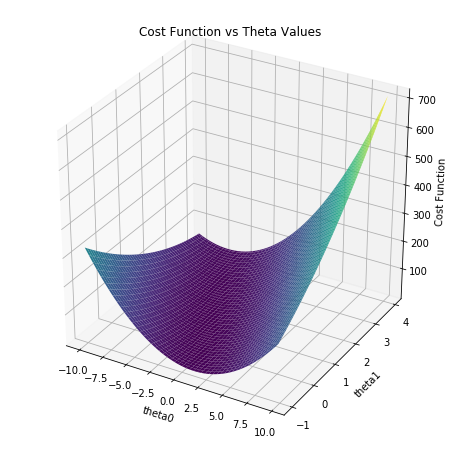

In [16]:
# Code to create a surface plot
from mpl_toolkits import mplot3d

# Plot theta0, theta1, cost
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d")

theta0vals, theta1vals = np.meshgrid(theta1, theta2)  # make the grid

p = ax.plot_surface(theta0vals, theta1vals, J, cmap='viridis', edgecolor='none')

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost Function')
plt.title("Cost Function vs Theta Values")

plt.savefig('plot3.png', format='png')  # save file as plot3.png
plt.show()

Does the surface plot appear to have a clear global minimum?

In [17]:
print('Yes, the minimum looks like it is in the center of axiss theta 0 and theta 1 as there is a giant dip')

Yes, the minimum looks like it is in the center of axiss theta 0 and theta 1 as there is a giant dip


In [18]:
print(J[0,0])

328.0929055495072


## Question 5 - The Normal Equation

Use the Normal Equation developed in class to minimize the cost function. This should result in a theta1 and theta2 that can generate the line of best fit.

In [19]:
# Normal Equation Calculation = (x.T * x)^-1 * x.T * y
tmp1 = np.linalg.inv(np.matmul(x_pop_2.T,x_pop_2)) #(x.T * x)^-1
print(tmp1.shape)

tmp2 = np.matmul(x_pop_2.T,y_prof) #x.T * y
print(tmp2.shape)

thetaFit = np.matmul(tmp1,tmp2) #(x.T * x)^-1 * x.T * y
print(thetaFit)

(2, 2)
(2, 1)
[[-3.89578088]
 [ 1.19303364]]


## Question 6 - Create a Plot of the Data and the Linear Regression Line

Make a plot that shows the original scatter plot data, with nice lables, and then overlays the liner function that best fits the data.

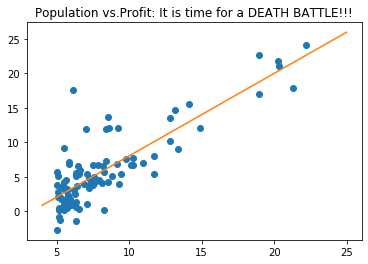

In [20]:
# Make plot
plt.plot(x, y, 'o')
plt.title('Population vs.Profit: It is time for a DEATH BATTLE!!!')
# Create the array of x-points for the line
numvals = 10
xpoints = np.array([np.linspace(4,25,numvals)]).T


# Create the array of y-points - using my linear fit (theta) values
# Delete the old vector of ones and create a new one
ones_galore = np.ones_like(xpoints).reshape(-1,1)

# Create the X matrix
Xpoints = np.hstack((ones_galore,xpoints))

# Then my y vales are just X times theta
ypoints = np.matmul(Xpoints,thetaFit)

# Plot the new data
plt.plot(xpoints,ypoints,'-')

### NOTE - the above could also be done with a for loop pluging in x values into y = theta[0]+theta[1]x

plt.show()


How did you do? Does the line seem to match the data well?

In [21]:
print('Definetly fits thet best it can be as it passes through the bulk of the points')

Definetly fits thet best it can be as it passes through the bulk of the points


## Question 7 - Use your ML Algorithm to Make Predictions

Now write a function that takes as an input the (theta1, theta2) values and the Popation and outputs a prediction for what the profit will be.

Test your code for the following values:

Population = 3.5

Population = 7

In [22]:
# Function that takes population as an input and predicts profit
def Predict_Y(x):
    
    X = np.array([1,x])
    
    y = np.matmul(X,theta)
    
    return y

In [23]:
# Test the function
Predict_Y(3.5)

array([23.625])

In [24]:
Predict_Y(7)

array([37.45])